In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from agents import FrustratedRescorlaAgent, HiddenMarkovDecisionProcess
from gym import SimpleBanditTask

In [12]:
# Example usage
env = SimpleBanditTask()
agent = FrustratedRescorlaAgent()

n_steps = 10000

total_reward = 0
for _ in range(n_steps):
    action = agent.act()
    reward = env.step(action)
    
    if reward == -1:  # Check if the environment has ended
        break
    total_reward += reward
    '''agent.update_belief_state(action, reward)
    agent.update_model(action, reward)'''

print(total_reward)
behav_data = env.extract_info()


3989


In [13]:
# plot learning curve
corrects = []
for block_id, block in behav_data.groupby('block_id'):
    corrects.append(block['target'] == block['best_target'])

corrects = np.array(corrects)
corrects.shape

(250, 40)

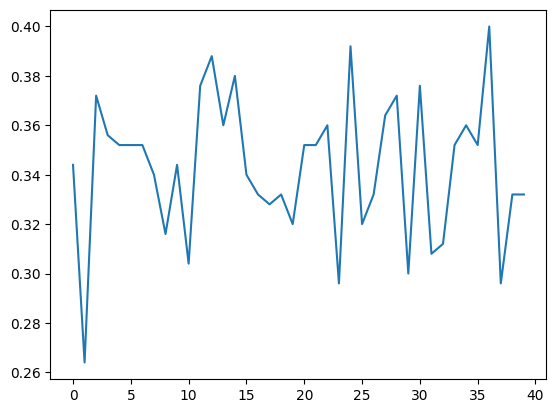

In [14]:
plt.plot(np.mean(corrects, axis=0))